# Car Price - Linear Regression

## Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## Loading the Raw Data

In [ ]:
raw_data = pd.read_csv('1.04. Car Data.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

In [ ]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [ ]:
#Removing Model from the data
data = raw_data.drop(['Model'], axis = 1)
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


## Dealing with Missing Values

In [ ]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [ ]:
#Dropping missing values
data_without_mv = data.dropna(axis = 0) 
data_without_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


<ipython-input-13-c1a0742e9acf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_without_mv['Price'])


<Axes: xlabel='Price', ylabel='Density'>

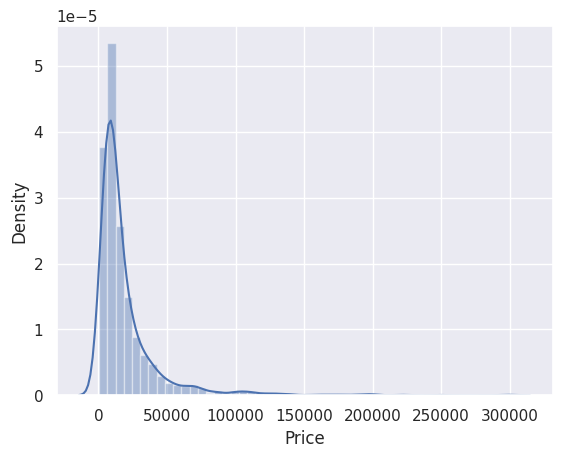

In [ ]:
sns.distplot(data_without_mv['Price'])

<ipython-input-14-15667e252760>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_without_mv['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

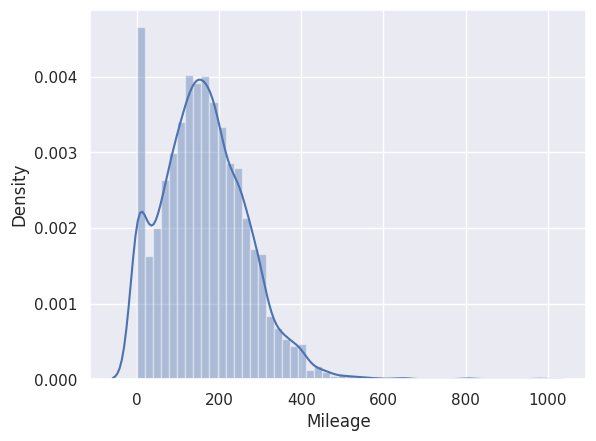

In [ ]:
sns.distplot(data_without_mv['Mileage'])

<ipython-input-16-c833cd56bc12>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_without_mv['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

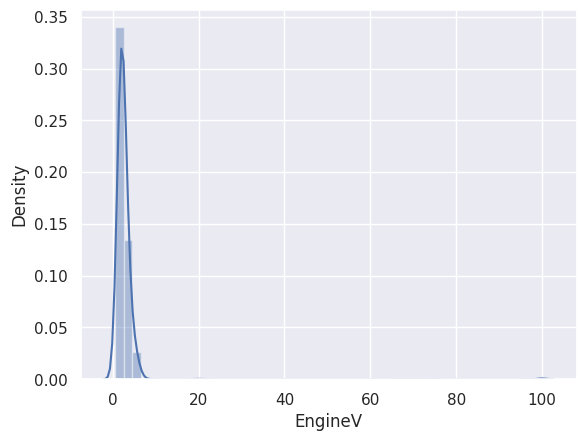

In [ ]:
sns.distplot(data_without_mv['EngineV'])

# Dealing with Outliers

 Select the data below a quantile value to avoid outliers

In [ ]:
q = data_without_mv['Price'].quantile(0.98)
data_1 = data_without_mv[data_without_mv['Price']<q]
q = data_1['Mileage'].quantile(0.98)
data_2 = data_1[data_1['Mileage']<q]
data_3 = data_2[data_2['EngineV']<6.5]
q = data_3['Year'].quantile(0.07)
data_4 = data_3[data_3['Year']>q]
data_4.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012


<ipython-input-20-e3d60c827185>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price'])


<Axes: xlabel='Price', ylabel='Density'>

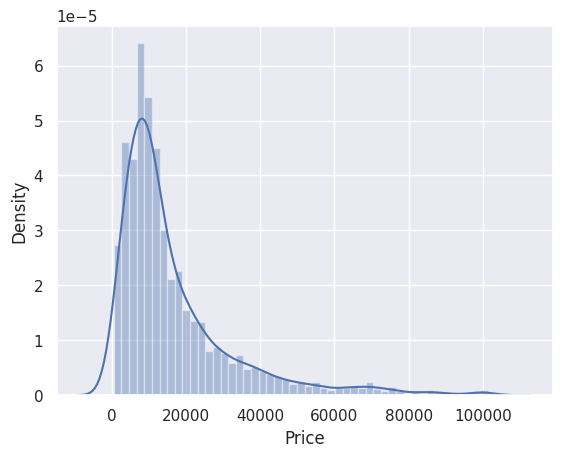

In [ ]:
sns.distplot(data_1['Price'])

<ipython-input-21-58baab269f56>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])


<Axes: xlabel='Mileage', ylabel='Density'>

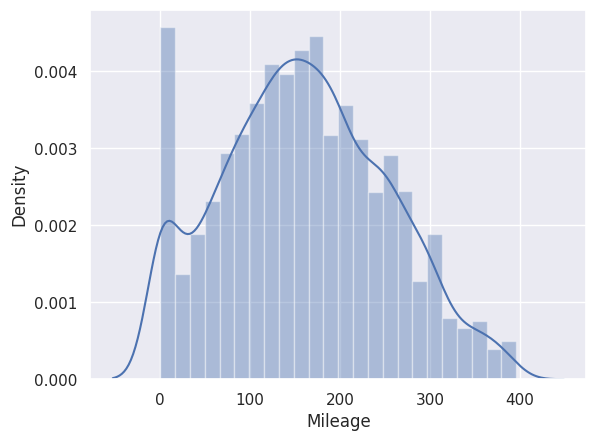

In [ ]:
sns.distplot(data_2['Mileage'])

<ipython-input-22-bb7c776735ce>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['EngineV'])


<Axes: xlabel='EngineV', ylabel='Density'>

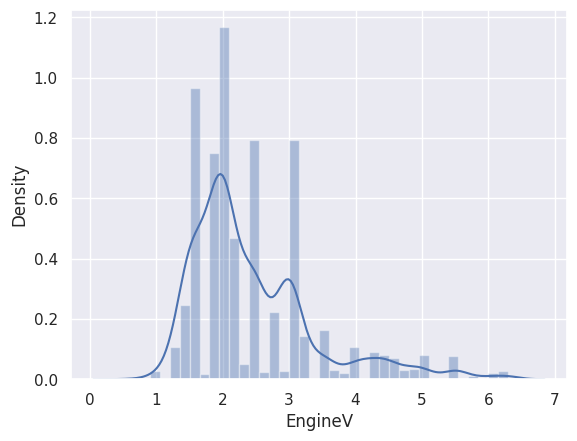

In [ ]:
sns.distplot(data_3['EngineV'])

<ipython-input-23-264ced41bbb3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])


<Axes: xlabel='Year', ylabel='Density'>

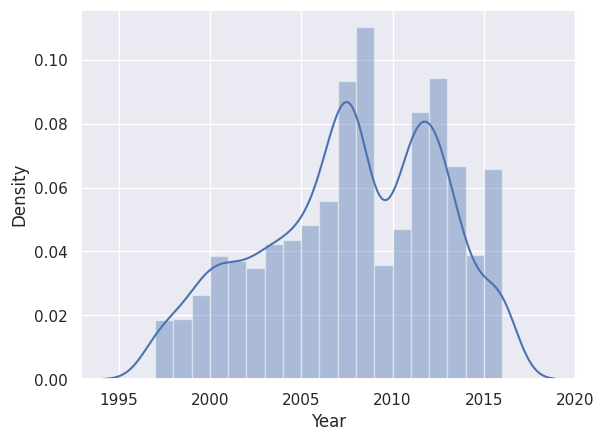

In [ ]:
sns.distplot(data_4['Year'])

In [ ]:
#reset the indexes
data_cleaned = data_4.reset_index(drop=True)

In [ ]:
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3540,3540.000000,3540,3540.000000,3540.000000,3540,3540,3540.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,780,NaN,1271,NaN,NaN,1698,3213,NaN
mean,NaN,18210.542616,NaN,153.100282,2.458630,NaN,NaN,2007.687006
std,NaN,16596.753863,NaN,87.369999,0.966011,NaN,NaN,4.867014
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1997.000000
25%,NaN,8000.000000,NaN,90.000000,1.800000,NaN,NaN,2004.000000
50%,NaN,12399.500000,NaN,151.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,22500.000000,NaN,214.000000,3.000000,NaN,NaN,2012.000000


## Check OLS assumptions

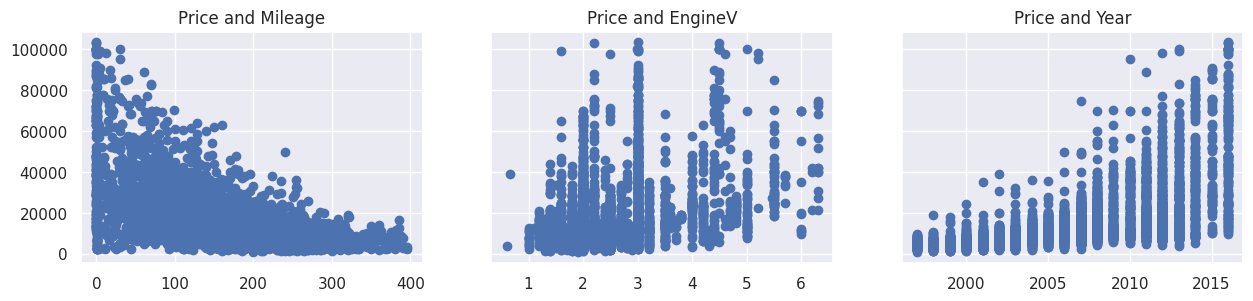

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax1.set_title('Price and Mileage')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax3.set_title('Price and Year')

plt.show()

As plots are of exponential in nature, transform Price using log function to get linearity

In [ ]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
1,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
2,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
3,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,9.560997
4,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,9.287209
...,...,...,...,...,...,...,...,...,...
3535,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,8.824678
3536,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3537,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3538,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


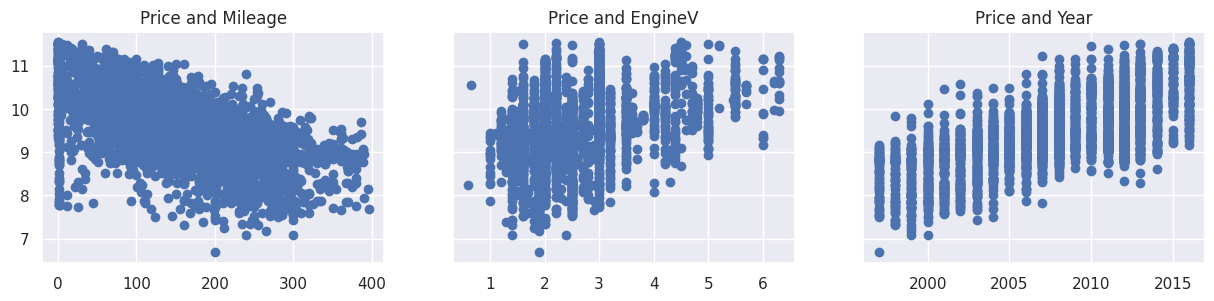

In [ ]:
#Again checking the plots
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax1.set_title('Price and Mileage')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax3.set_title('Price and Year')

plt.show()

Now the plots are linear.

Drop Price column as we are now dealing with log_price

In [ ]:
data_cleaned = data_cleaned.drop(['Price'], axis = 1)

Checking Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'EngineV', 'Year']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [ ]:
vif

,VIF,Features
0,4.053660,Mileage
1,7.484301,EngineV
2,10.145329,Year


Consider all the features including Year as it is approximately 10 which is okay.

## Creating Dummy Variables for Categorical Variables

In [ ]:
data_with_dummies = pd.get_dummies(data_cleaned, drop_first = True)

In [ ]:
data_with_dummies.head()

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,358,5.0,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
1,240,4.2,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,120,2.0,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,200,2.7,2006,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,193,1.5,2012,9.287209,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
#Rearrange columns - Bring log_price to the first column
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [ ]:
cols = ['log_price','Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,9.495519,358,5.0,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
1,10.043249,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,9.814656,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,9.560997,200,2.7,2006,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,9.287209,193,1.5,2012,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


# Linear Regression Model

In [ ]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis = 1)

### Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 111)


# Creating the linear Regression model

In [ ]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

### Predicting the y_hat values for x_train and comparing them with y_train 

In [ ]:
y_hat = reg.predict(x_train)

The values in the plot should be close to the 45° line as y_hat and y_train should be the same

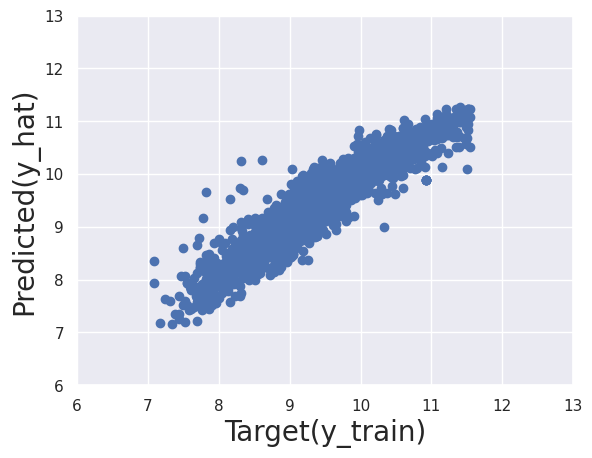

In [ ]:
plt.scatter(y_train, y_hat)
plt.xlabel('Target(y_train)', size = 20)
plt.ylabel('Predicted(y_hat)', size = 20)

plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

<ipython-input-52-c0e7c75705dc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat - y_train)


Text(0.5, 1.0, 'Residual PDF')

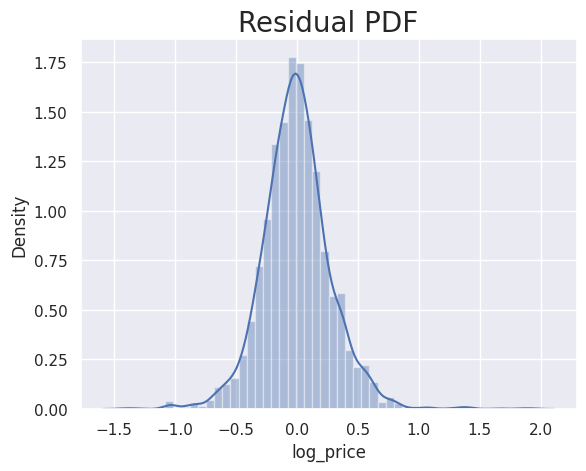

In [ ]:
#Residual Plot
sns.distplot(y_hat - y_train)
plt.title('Residual PDF', size = 20)

### R-Squared value


In [ ]:
reg.score(x_train, y_train)

0.8760096068855574

### Intercept

In [ ]:
reg.intercept_

9.489345480922637

### Coefficients

In [ ]:
reg.coef_

array([-0.08974117,  0.22628271,  0.44219458,  0.03309407, -0.00389406,
       -0.12962119, -0.20769639, -0.07041119, -0.10423784, -0.09226348,
       -0.06708909, -0.12983069, -0.08392287, -0.14061914, -0.03744764,
       -0.01697182, -0.05556368,  0.2370506 ])

In [ ]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.089741
1,EngineV,0.226283
2,Year,0.442195
3,Brand_BMW,0.033094
4,Brand_Mercedes-Benz,-0.003894
5,Brand_Mitsubishi,-0.129621
6,Brand_Renault,-0.207696
7,Brand_Toyota,-0.070411
8,Brand_Volkswagen,-0.104238
9,Body_hatch,-0.092263


## Testing

In [ ]:
y_hat_test = reg.predict(x_test)

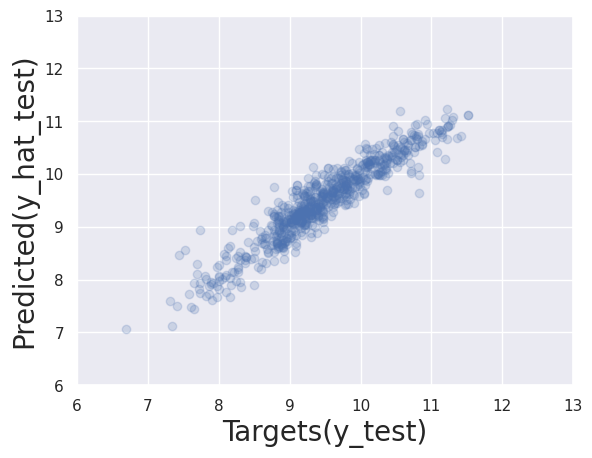

In [ ]:
#Plotting y_hat_test and y_test
plt.scatter(y_test, y_hat_test, alpha = 0.2)
plt.xlabel('Targets(y_test)', size = 20)
plt.ylabel('Predicted(y_hat_test)', size = 20)

plt.xlim(6,13)
plt.ylim(6,13)
plt.show()